<a href="https://colab.research.google.com/github/Ashwin-2408/Tensor_Flow_Learning/blob/main/notebooks/Medical_Insurance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Practice in DeepLearning

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
Insurance_Data=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
Insurance_Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
Insurance_Data["age"]

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [5]:
Insurance_encoded=pd.get_dummies(Insurance_Data,dtype=np.int64)

In [6]:
Insurance_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


###Splitting the one hot encoded data into X and Y(splitting the data into independent (X) and dependent data(Y))

In [7]:
X=Insurance_encoded.drop("charges",axis=1)
Y=Insurance_encoded["charges"]

In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [10]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=42)

##Creating the Regression model

In [11]:
X_Train.shape

(1070, 11)

In [12]:
import tensorflow as tf
import random
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

Insurance_Model=tf.keras.Sequential([tf.keras.Input((11,)),tf.keras.layers.Dense(100),tf.keras.layers.Dense(1)])
Insurance_Model.compile(loss="mae",optimizer=tf.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
Insurance_Model.fit(X_Train,Y_Train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13130.0547 - mae: 13130.0547
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11342.6729 - mae: 11342.6729
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7986.4561 - mae: 7986.4561
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7392.2090 - mae: 7392.2090
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7315.4429 - mae: 7315.4429
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7238.0693 - mae: 7238.0693
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7159.2749 - mae: 7159.2749
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7074.0669 - mae: 7074.0669
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6981.9824 - mae: 6981.9824
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6884.0845 - mae: 6884.0845
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6770.5029 - mae: 6770.5029
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [13]:
Insurance_Model.evaluate(X_Test,Y_Test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3476.0452 - mae: 3476.0452  


[3403.263671875, 3403.263671875]

In [14]:
Y_Test

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
109,47055.53210
575,12222.89830
535,6067.12675
543,63770.42801


## Lets try improving our model


In [15]:
Insurance_Model_V2=tf.keras.Sequential([tf.keras.Input((11,)),tf.keras.layers.Dense(100,activation="relu"),tf.keras.layers.Dense(100,activation="relu"),tf.keras.layers.Dense(1)])
Insurance_Model_V2.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
history=Insurance_Model_V2.fit(X_Train,Y_Train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12716.9990 - mae: 12716.9990
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7570.9497 - mae: 7570.9497
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7268.4111 - mae: 7268.4111
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7075.4561 - mae: 7075.4561
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6803.7729 - mae: 6803.7729
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6471.4858 - mae: 6471.4858
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6231.9570 - mae: 6231.9570
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6098.0908 - mae: 6098.0908
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5893.2393 - mae: 5893.2393
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5637.3589 - mae: 5637.3589
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5286.1743 - mae: 5286.1743
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [16]:
Insurance_Model_V2.evaluate(X_Test,Y_Test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1874.2339 - mae: 1874.2339  


[1852.7213134765625, 1852.7213134765625]

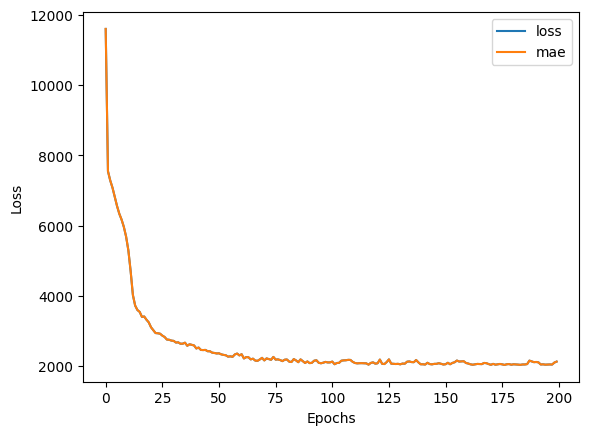

In [17]:
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### How long should you train for,we can use something called an earlyStopping callback function while fitting the model which will stop training if the model does not improve after certain amount of epochs

In [18]:
earlystopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=4,restore_best_weights=True)
Insurance_Model_V3=tf.keras.Sequential([tf.keras.Input((11,)),tf.keras.layers.Dense(100,activation="relu"),tf.keras.layers.Dense(100,activation="relu"),tf.keras.layers.Dense(1)])
Insurance_Model_V3.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
history=Insurance_Model_V3.fit(X_Train,Y_Train,epochs=200,validation_data=(X_Test,Y_Test),callbacks=[earlystopping])

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 12462.3447 - mae: 12462.3447 - val_loss: 8145.4141 - val_mae: 8145.4141
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7639.3047 - mae: 7639.3047 - val_loss: 7412.7109 - val_mae: 7412.7109
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7185.4478 - mae: 7185.4478 - val_loss: 7129.6616 - val_mae: 7129.6616
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6957.0591 - mae: 6957.0591 - val_loss: 6762.1855 - val_mae: 6762.1855
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6635.5444 - mae: 6635.5444 - val_loss: 6351.0776 - val_mae: 6351.0776
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6324.8096 - mae: 6324.8096 - val_loss: 6244.3501 - val_mae: 6244.3501
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6198.8569 - mae: 6198.8569 - val_loss: 6013.1118 - val_mae: 6013.1118
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5986.4995 - mae: 5986.4995 - val_lo

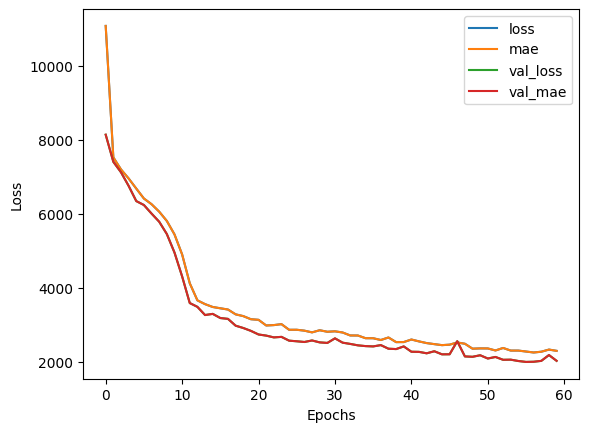

In [19]:
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# PreProcessing Data : Normalization and Standardisation

* Neural networks prefer Normalization

In [22]:
Insurance_Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

column_transform=ColumnTransformer([("minmax",MinMaxScaler(),['age','bmi','children']),("onehot",OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region'])])

Normalized_Insurance_Data=column_transform.fit_transform(Insurance_Data)

In [36]:
Normalized_Insurance_Data


array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [37]:
Normalized_Insurance_Data.shape

(1338, 11)

In [38]:
Normalized_Insurance_Data=pd.DataFrame(Normalized_Insurance_Data)

In [39]:
Normalized_Insurance_Data

,0,1,2,3,4,5,6,7,8,9,10
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [40]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(Normalized_Insurance_Data,Y,test_size=0.2,random_state=42)

In [42]:
# Model for normalized data , same model

Normalized_Insurance_Model=tf.keras.Sequential([tf.keras.Input((11,)),tf.keras.layers.Dense(100,activation="relu"),tf.keras.layers.Dense(100,activation="relu"),tf.keras.layers.Dense(1)])
Normalized_Insurance_Model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
history=Normalized_Insurance_Model.fit(X_Train,Y_Train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13217.9814 - mae: 13217.9814
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10486.8789 - mae: 10486.8789
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7715.5386 - mae: 7715.5386
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6954.8433 - mae: 6954.8433
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5806.8667 - mae: 5806.8667
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4162.7344 - mae: 4162.7344
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3574.4419 - mae: 3574.4419
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3461.1965 - mae: 3461.1965
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3402.3757 - mae: 3402.3757
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3355.2512 - mae: 3355.2512
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3318.4399 - mae: 3318.4399
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

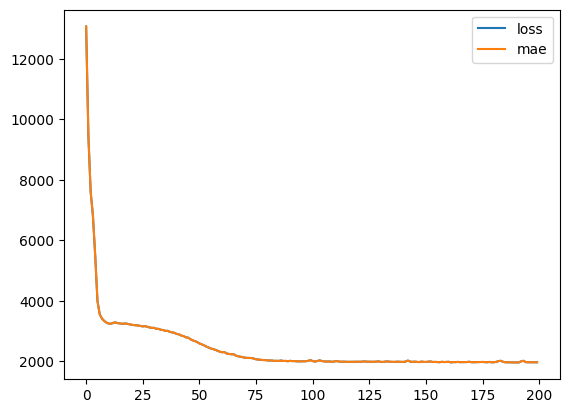

In [47]:
pd.DataFrame(history.history).plot()
plt.show()

By normalizing the data we can see that the model converges quicker ,basically it takes less epochs to reach the same state as unormalized data.This happens because the gradient descent becomes efficient
